In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [ ]:
features_nan=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_nan:
  print(features,df[features].isnull().sum())

LotFrontage 218
Alley 1183
MasVnrType 7
MasVnrArea 7
BsmtQual 35
BsmtCond 35
BsmtExposure 36
BsmtFinType1 35
BsmtFinType2 36
FireplaceQu 599
GarageType 71
GarageYrBlt 71
GarageFinish 71
GarageQual 71
GarageCond 71
PoolQC 1255
Fence 1019
MiscFeature 1208


In [ ]:
#PoolQC,Fence,MiscFeature,FireplaceQu,Alley

df=df.drop('PoolQC',axis=1)
df=df.drop('Fence',axis=1)
df=df.drop('MiscFeature',axis=1)
df=df.drop('FireplaceQu',axis=1)
df=df.drop('Alley',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [ ]:
df['MasVnrType'].dtype

dtype('O')

In [ ]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(),inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)



In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,21.387230,10391.598333,1.381394,1.119465,29.933659,20.617506,181.677545,439.025793,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,60.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.110471,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,79.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
features_nan=[features for features in df.columns if df[features].isnull().sum()>1]
for features in features_nan:
  print('missing values',features,df[features].isnull().sum())

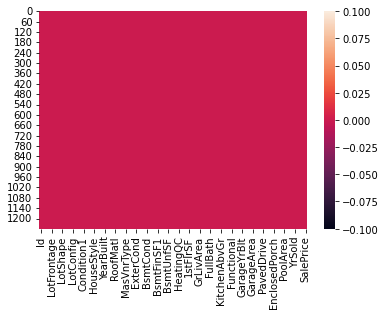

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
numerical_features=[features for features in df.columns if df[features].dtypes !='o']

for features in numerical_features:
  print(features)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [ ]:
year_features=[features for features in numerical_features if 'Yr' in features or 'Year' in features ]

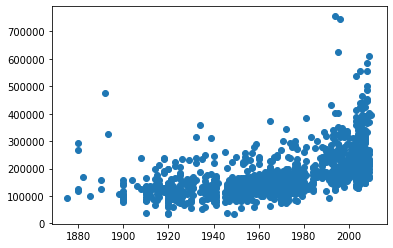

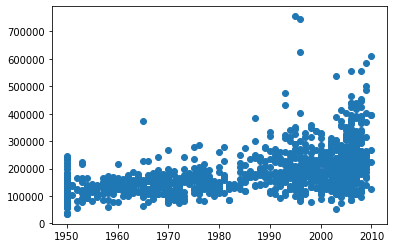

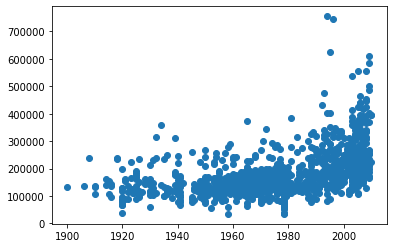

In [ ]:
for features in year_features:
  if features!= "YrSold":
    data=df.copy()
    plt.scatter(data[features],df['SalePrice'])
    plt.show()


In [ ]:
descrite_values=[features for features in df.columns if len(df[features].unique())<25 and features not in year_features]
descrite_values

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [ ]:
descrite_features=[features for features in df.columns if len(df[features].unique())<25 and features not in year_features+['id']]
for features in descrite_features:
  print(features)

MSSubClass
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageFinish
GarageCars
GarageQual
GarageCond
PavedDrive
3SsnPorch
PoolArea
MiscVal
MoSold
SaleType
SaleCondition


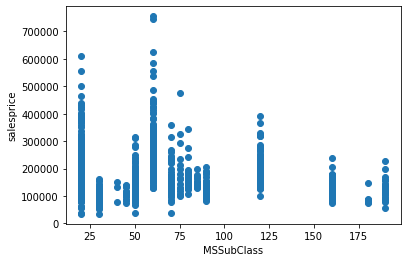

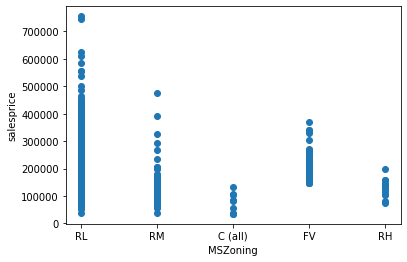

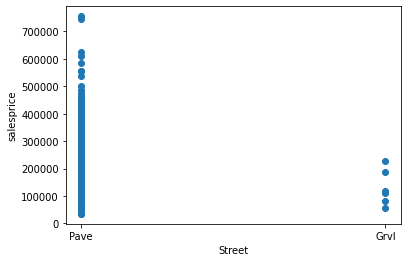

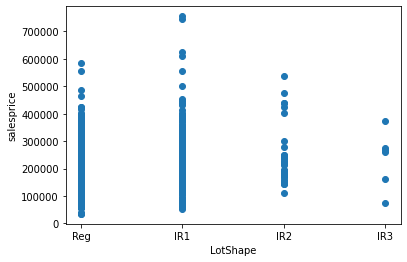

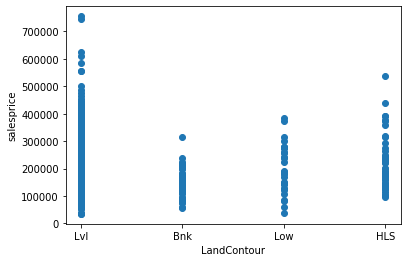

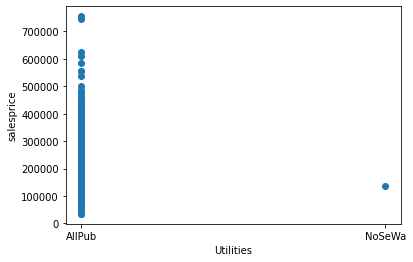

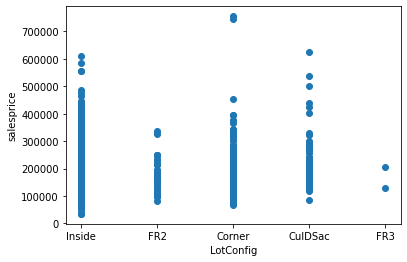

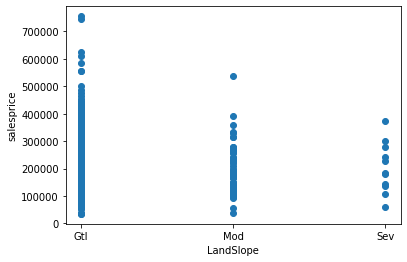

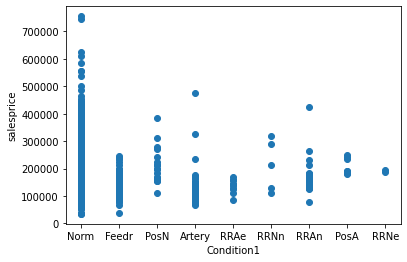

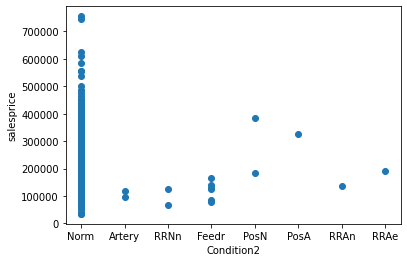

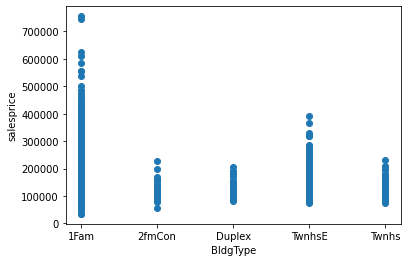

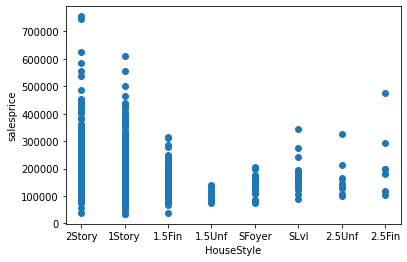

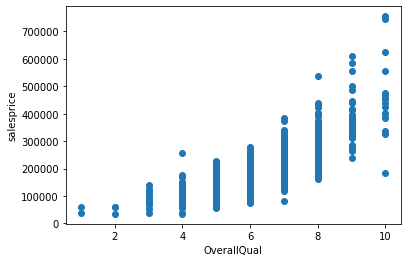

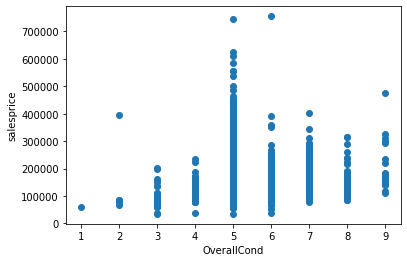

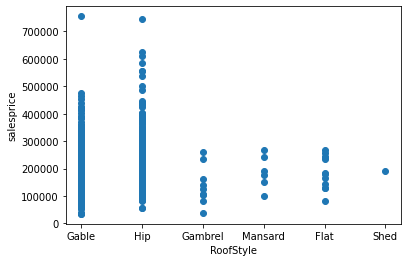

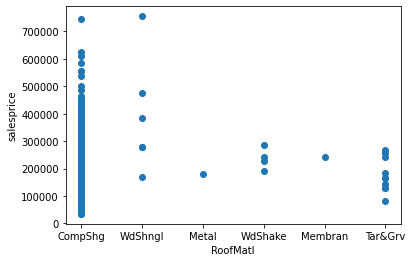

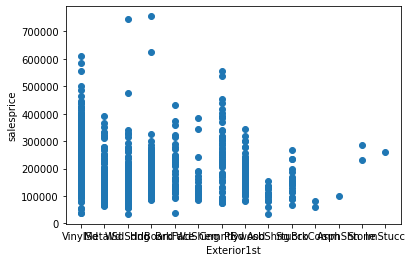

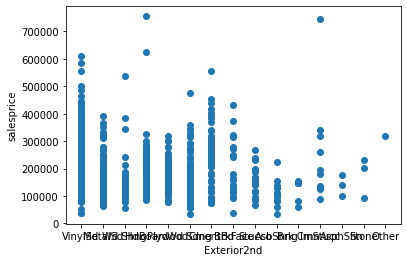

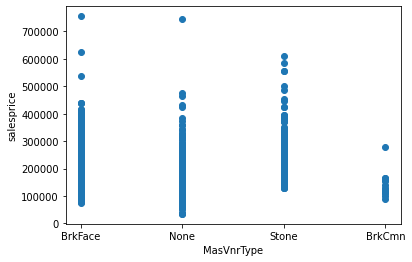

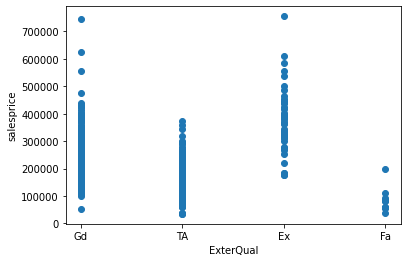

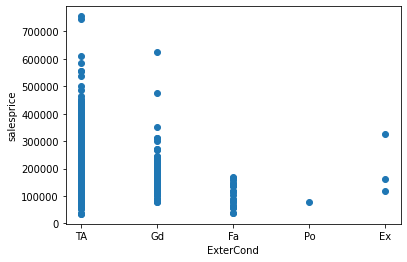

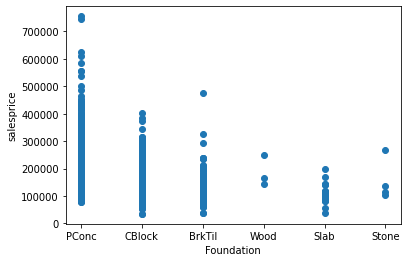

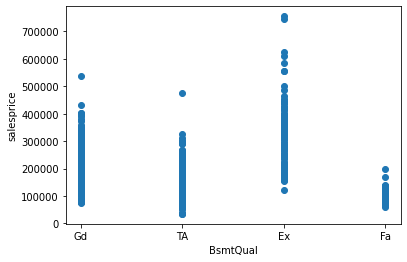

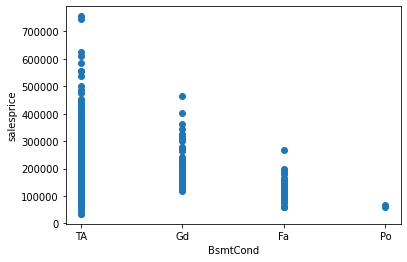

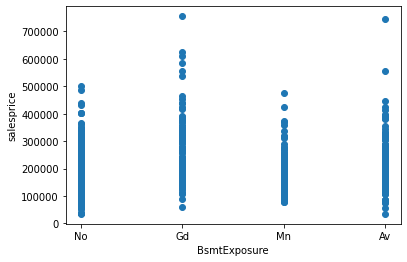

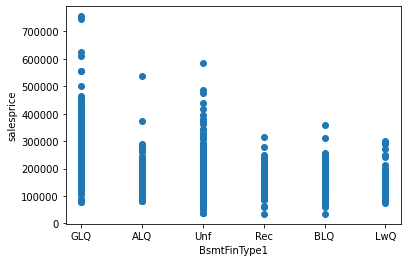

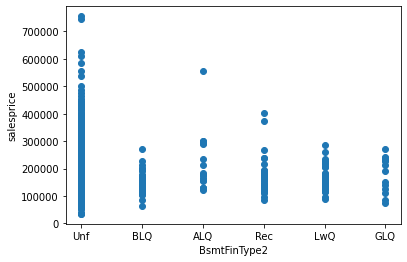

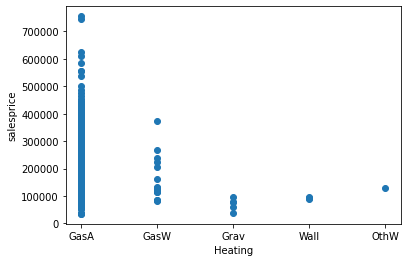

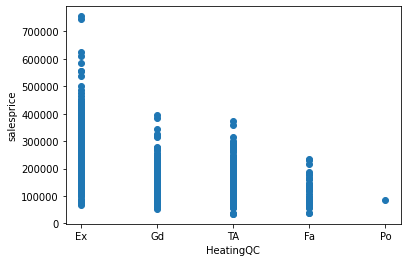

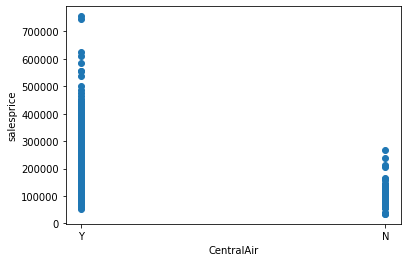

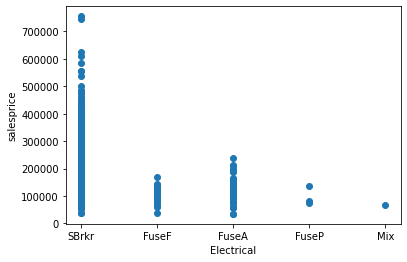

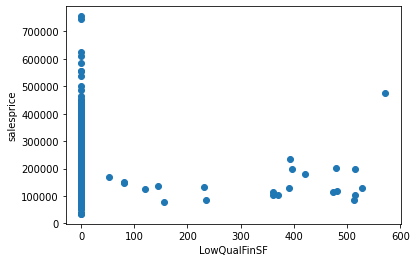

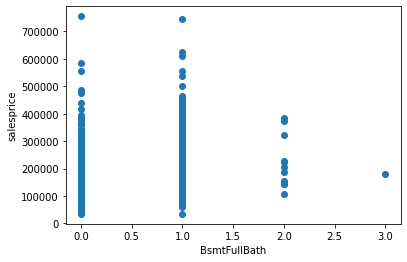

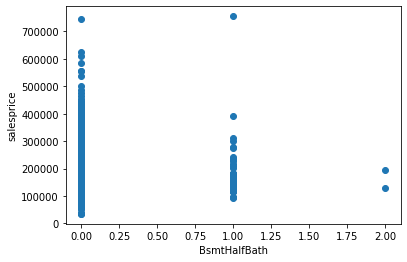

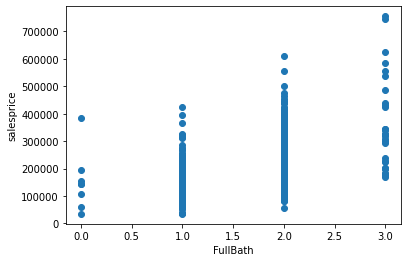

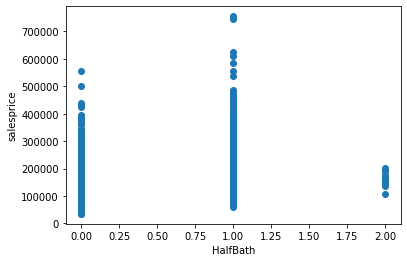

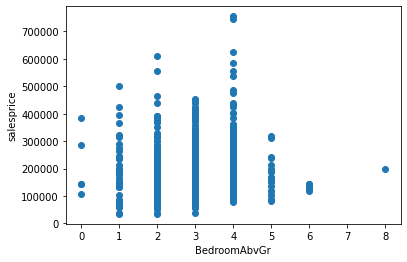

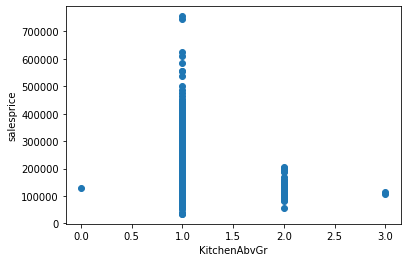

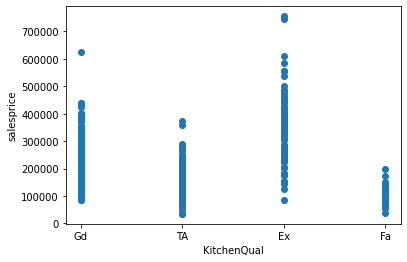

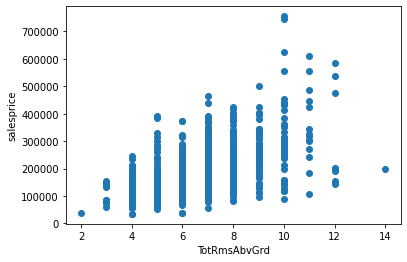

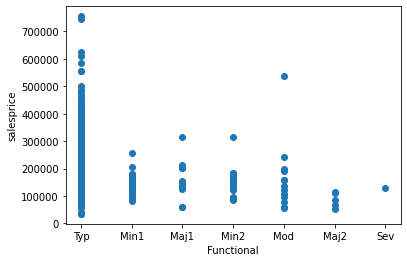

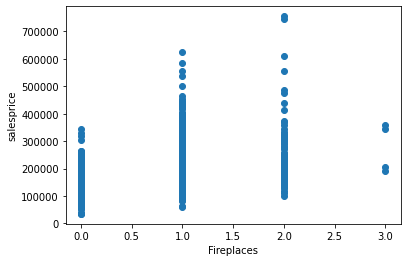

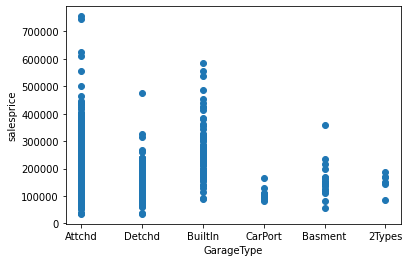

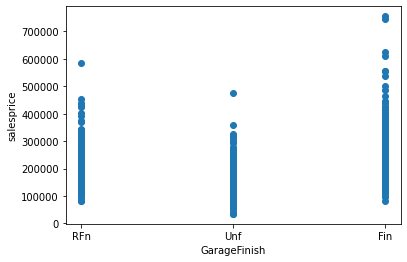

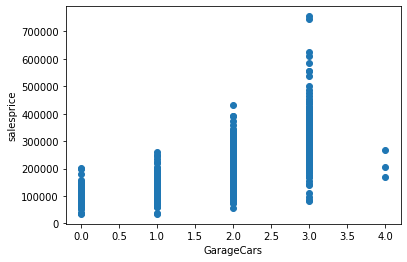

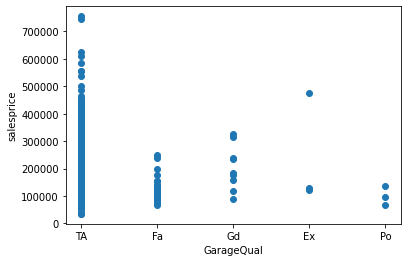

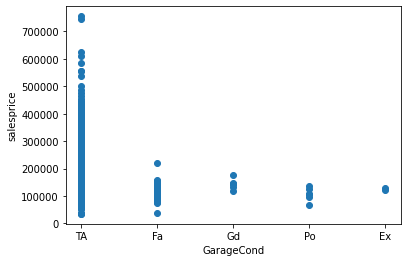

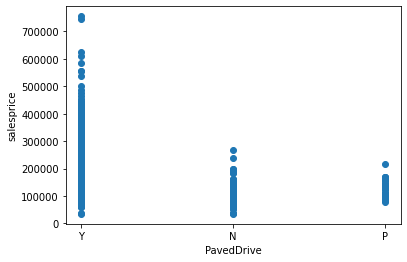

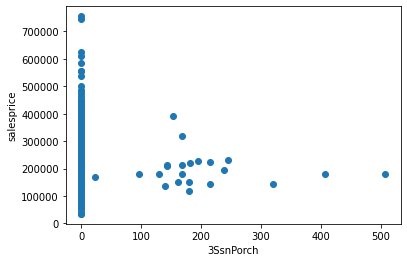

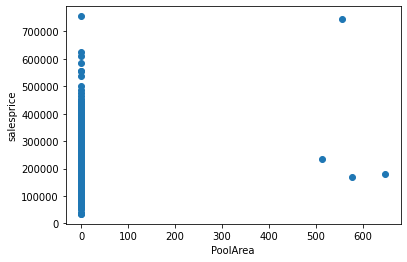

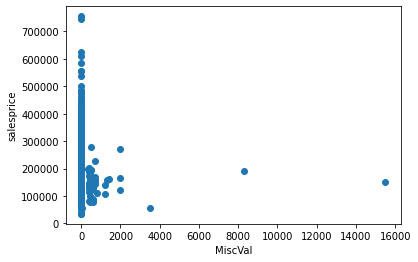

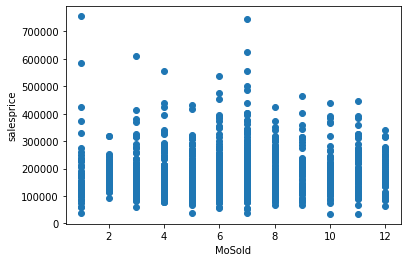

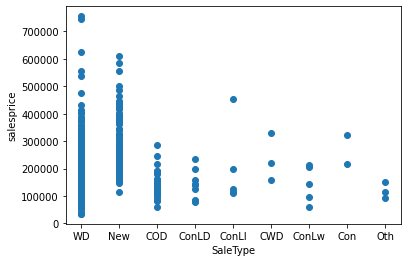

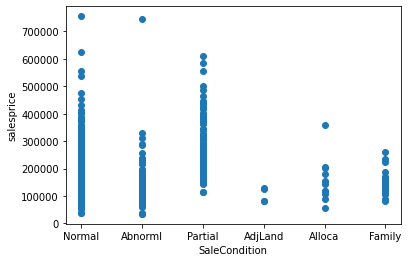

In [ ]:
for i in descrite_features:
  data=df.copy()
  plt.scatter(data[i],data['SalePrice'])
  plt.xlabel(i)
  plt.ylabel('salesprice')
  plt.show()


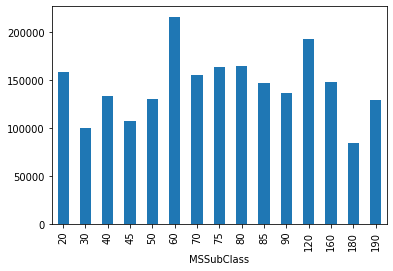

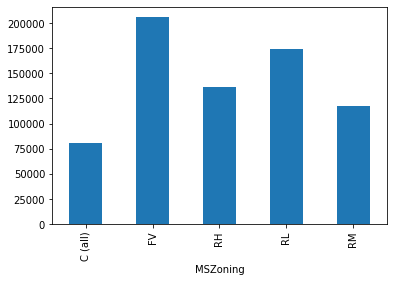

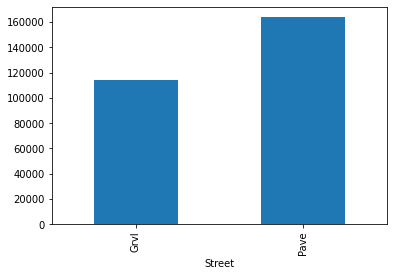

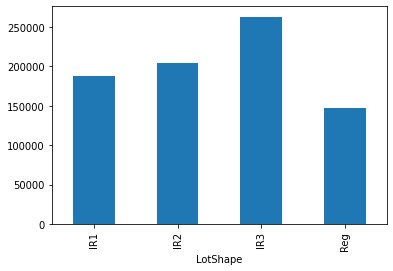

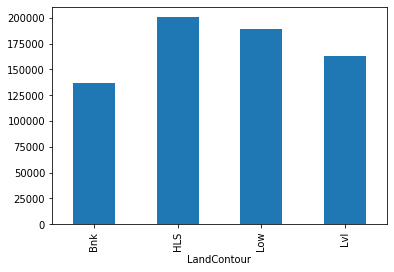

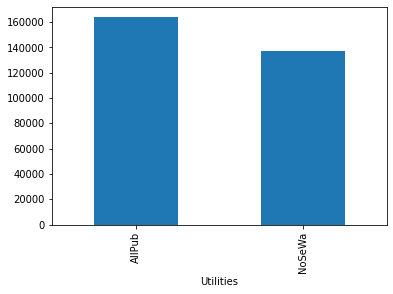

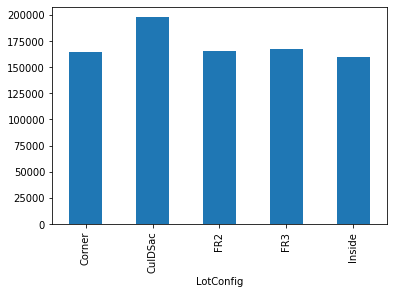

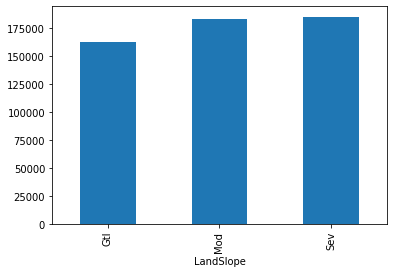

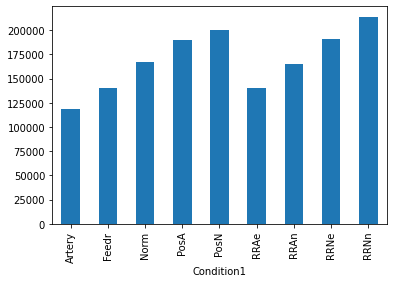

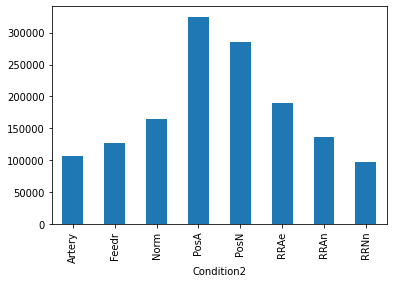

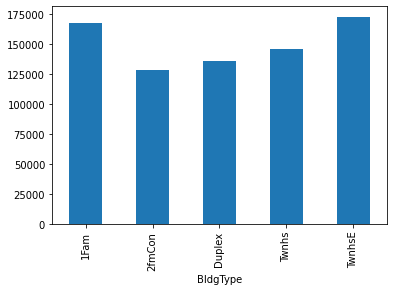

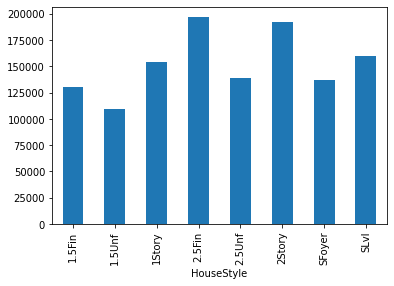

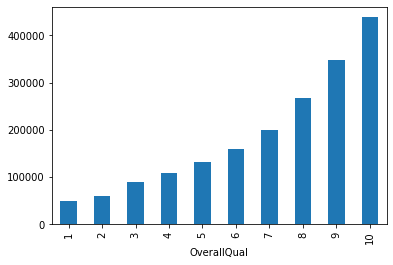

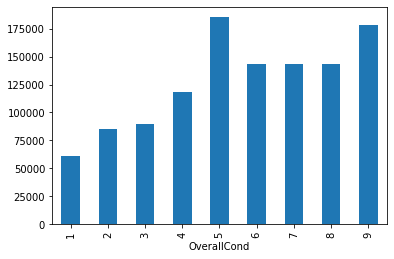

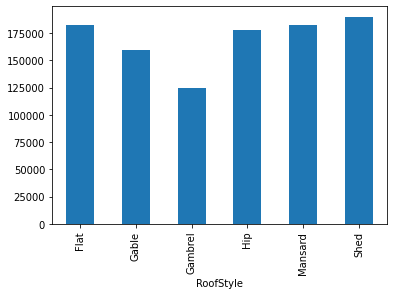

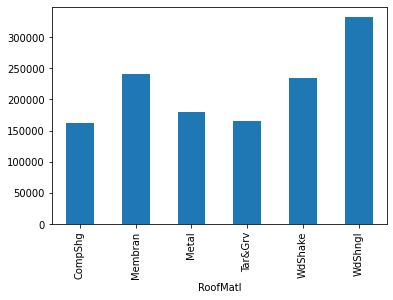

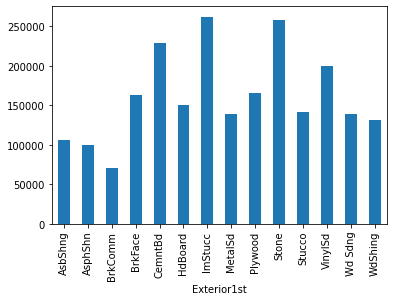

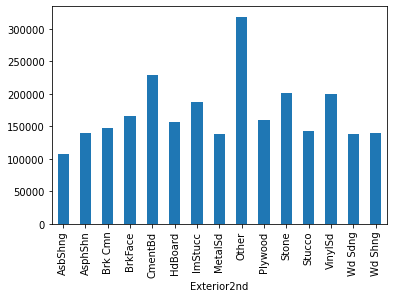

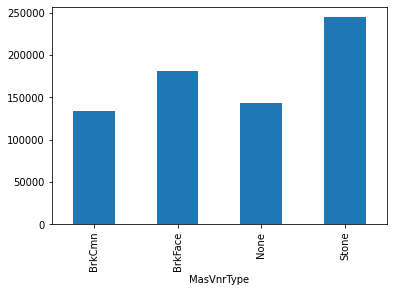

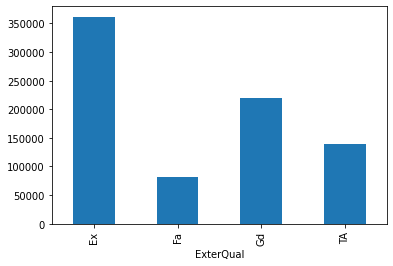

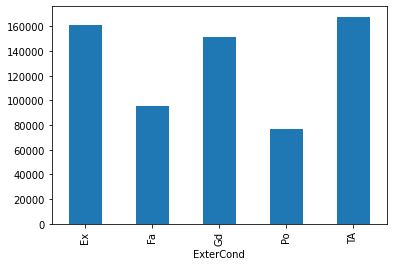

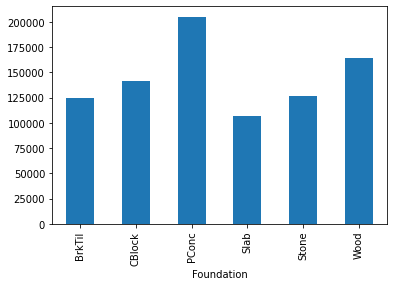

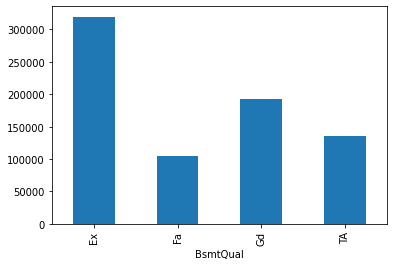

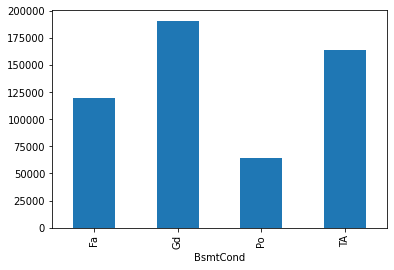

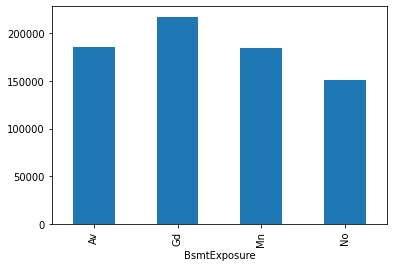

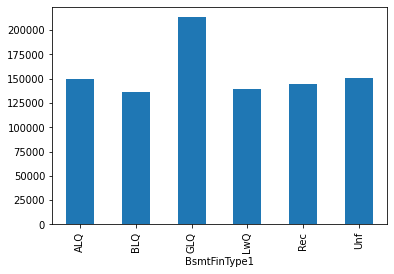

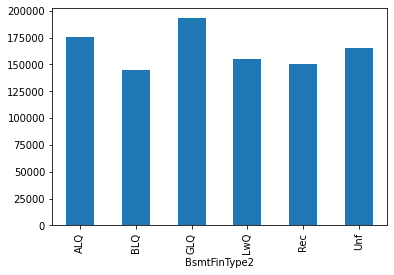

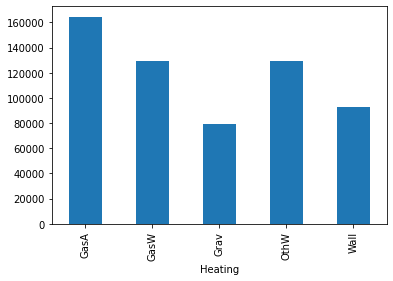

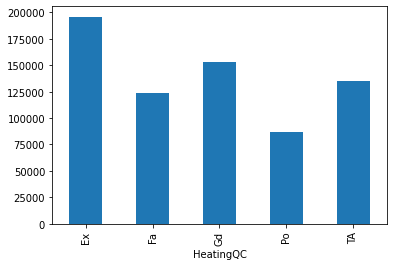

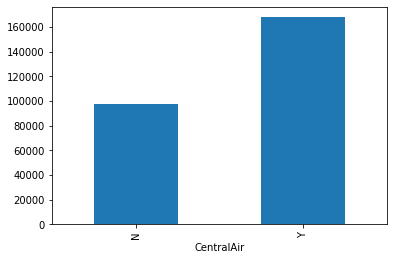

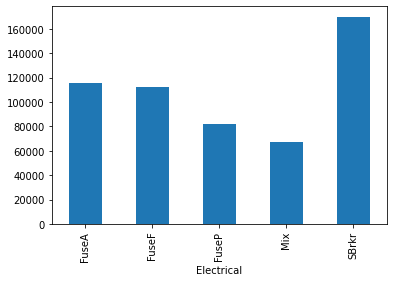

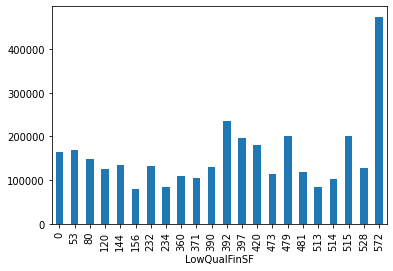

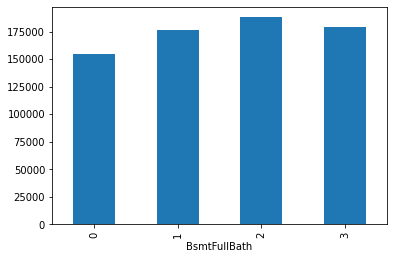

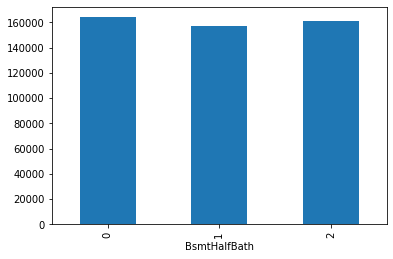

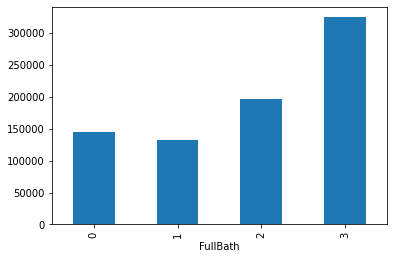

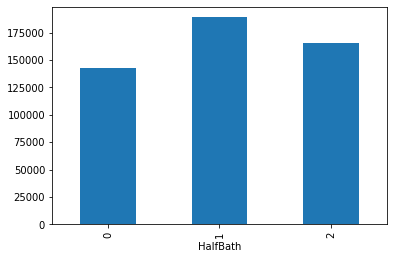

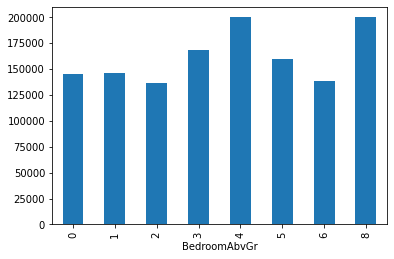

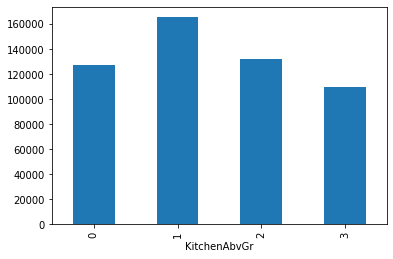

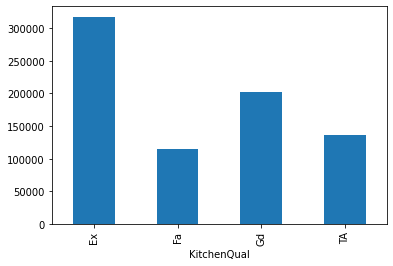

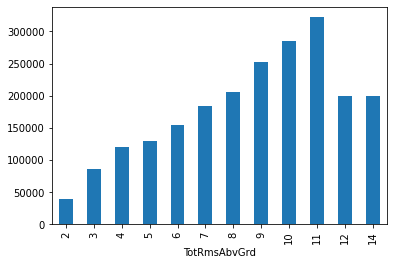

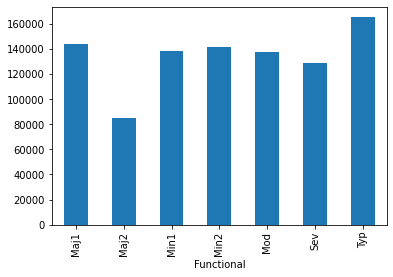

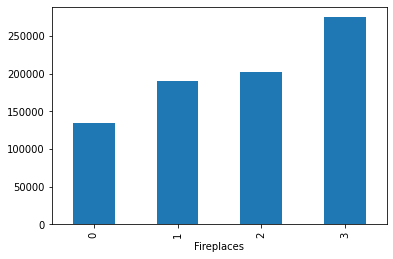

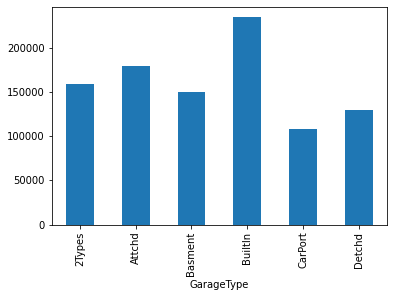

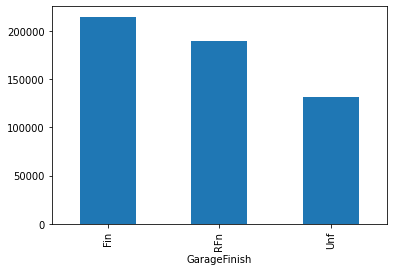

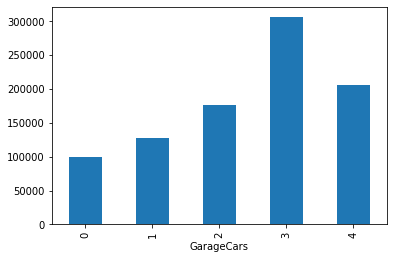

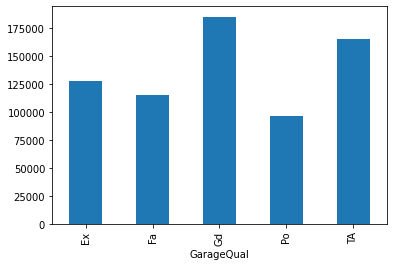

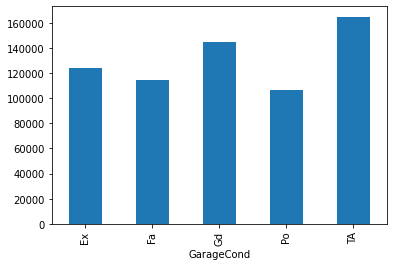

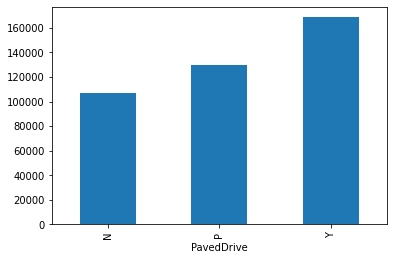

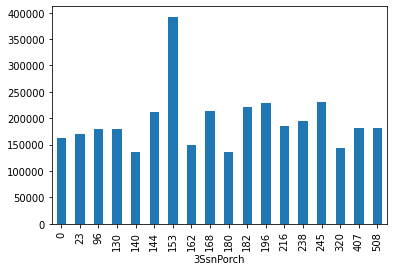

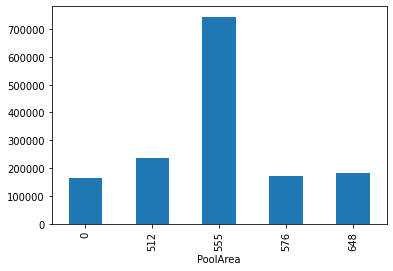

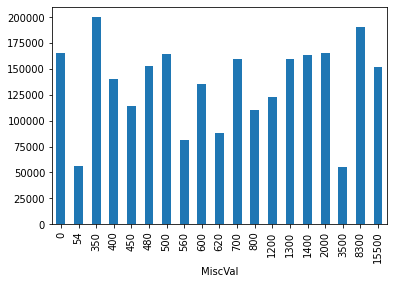

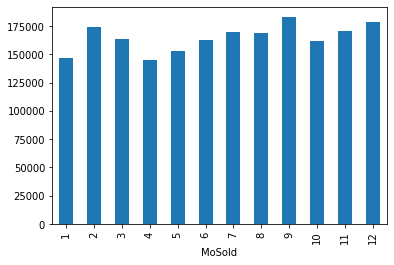

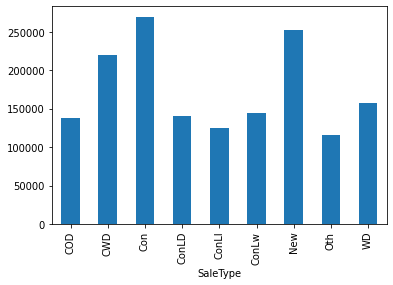

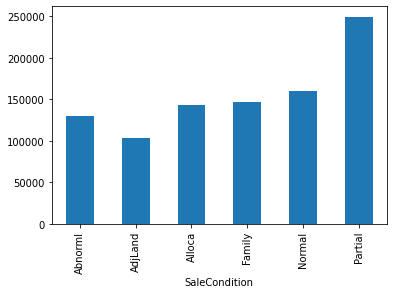

In [ ]:
for i in descrite_features:
  data=df.copy()
  data.groupby(i)['SalePrice'].median().plot.bar()
  plt.show()

In [ ]:
contineous_features=[features for features in df.columns if len(df[features].unique())>=25 and features not in year_features + ['Id']]

In [ ]:
contineous_features

['LotFrontage',
 'LotArea',
 'Neighborhood',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


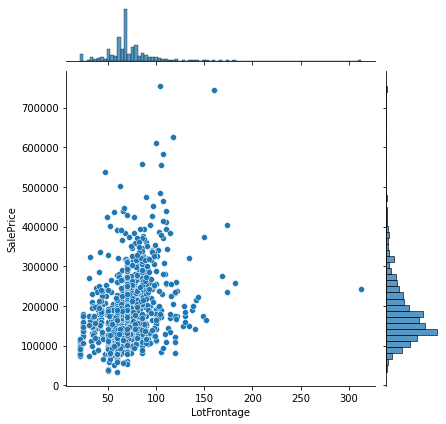

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


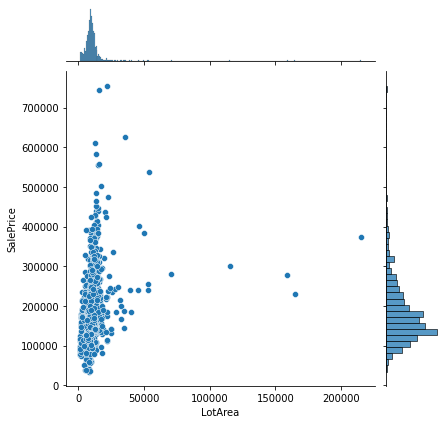

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


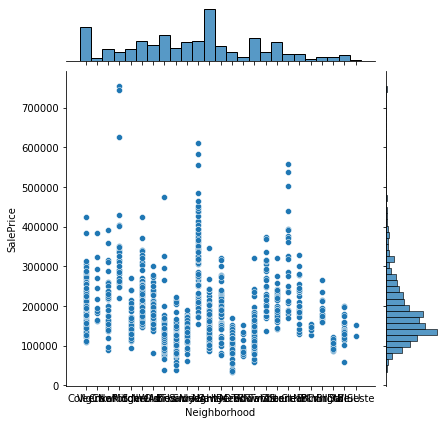

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


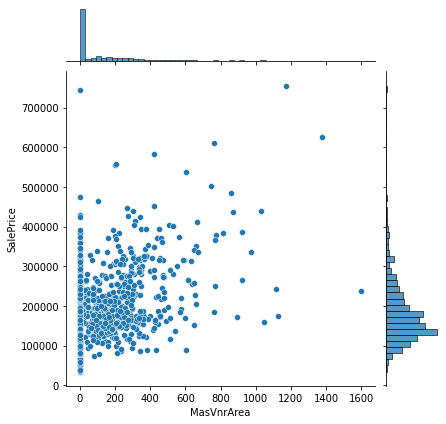

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


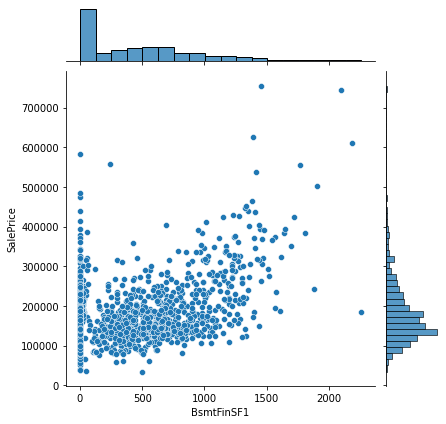

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


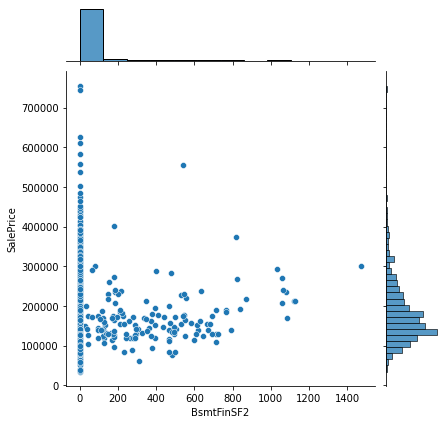

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


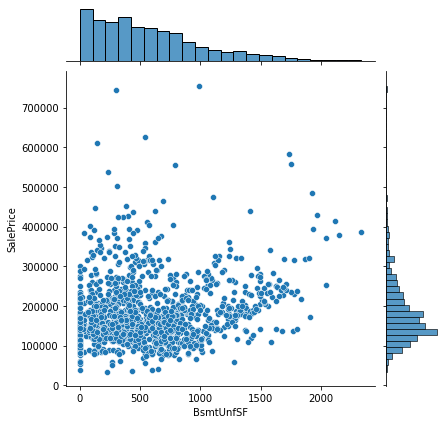

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


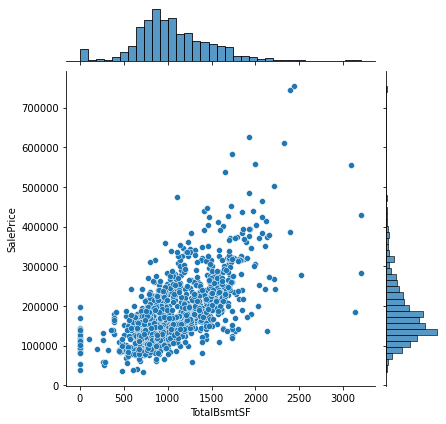

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


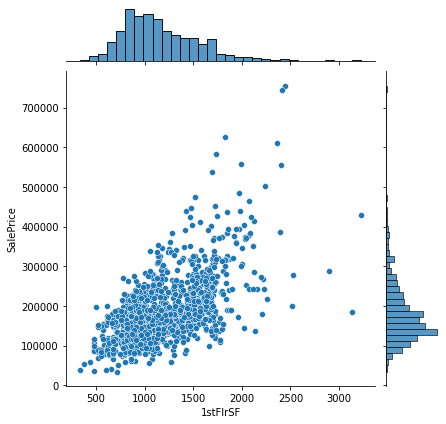

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


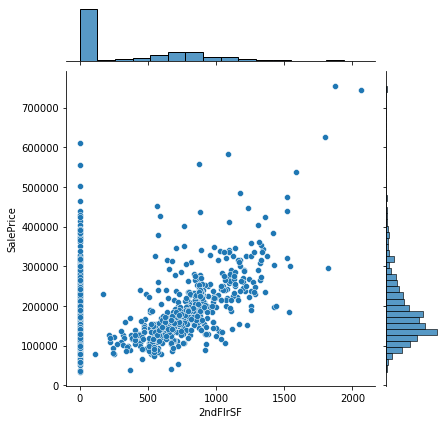

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


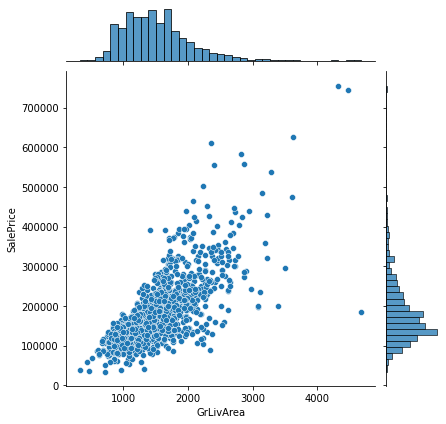

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


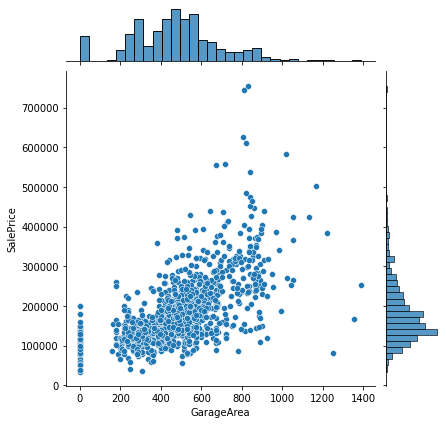

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


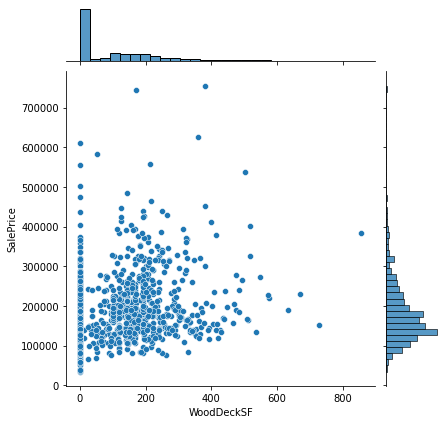

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


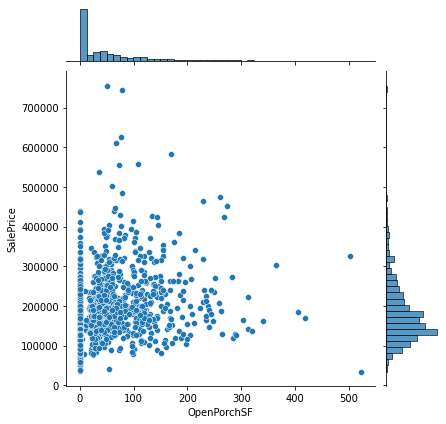

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


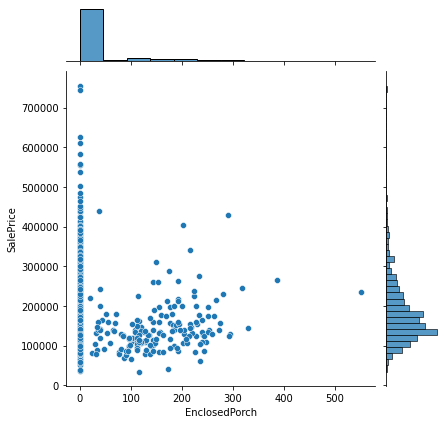

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


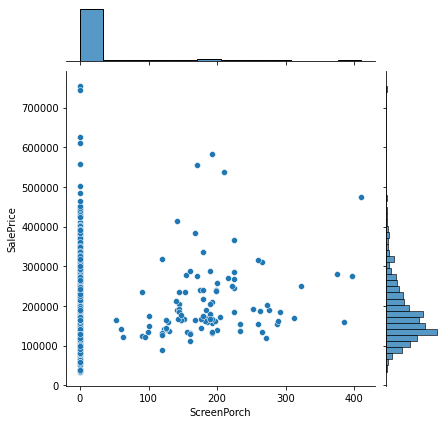

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


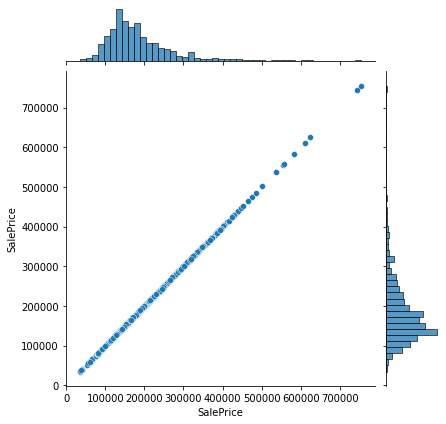

In [ ]:
for featues in contineous_features:
  data=df.copy()
  sns.jointplot(data[featues],data['SalePrice'])
  plt.show()

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
cat_feture=df.select_dtypes(include='object').columns.tolist()
for i in cat_feture:
  cat_dict=df[i].value_counts().to_dict()
  df[i]=df[i].map(cat_dict)


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,995,65.0,8450,1253,794,1134,1258,906,...,0,0,0,0,0,2,2008,1087,1024,208500
1,2,20,995,80.0,9600,1253,794,1134,1258,40,...,0,0,0,0,0,5,2007,1087,1024,181500
2,3,60,995,68.0,11250,1253,421,1134,1258,906,...,0,0,0,0,0,9,2008,1087,1024,223500
3,4,70,995,60.0,9550,1253,421,1134,1258,232,...,272,0,0,0,0,2,2006,1087,92,140000
4,5,60,995,84.0,14260,1253,421,1134,1258,40,...,0,0,0,0,0,12,2008,1087,1024,250000


In [ ]:
x=df.drop("SalePrice",axis=1)
y=df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((1007, 75), (252, 75), (1007,), (252,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(bootstrap=True,max_depth=9,max_features='auto',min_samples_split=5,min_samples_leaf=2,n_estimators=500)
model1.fit(xtrain,ytrain)

ypridict=model1.predict(xtrain)


In [ ]:

from sklearn.metrics import r2_score
ypridict_test=model1.predict(xtest)
r2_score(ytrain,ypridict),r2_score(ytest,ypridict_test)

(0.9681672312032673, 0.8661198988562335)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(xtrain,ytrain)

ypridict=model1.predict(xtrain)


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(x, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(xtrain,ytrain)
linear_predict=linear_model.predict(xtrain)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('r2_score',r2_score(ytrain,linear_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,linear_predict))
print('MSE',mean_squared_error(ytrain,linear_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,linear_predict)))



r2_score 0.882623438812861
mean_absolute_error 18017.146709177152
MSE 793403146.5876371
RMSE 28167.412848673855


In [ ]:
from sklearn.linear_model import Lasso

lasso_model=Lasso()
lasso_model.fit(xtrain,ytrain)
lasso_predict=lasso_model.predict(xtrain)

In [ ]:
print('r2_score',r2_score(ytrain,lasso_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,lasso_predict))
print('MSE',mean_squared_error(ytrain,lasso_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,lasso_predict)))

r2_score 0.8826234220651963
mean_absolute_error 18017.139408686857
MSE 793403259.7929462
RMSE 28167.414858182252


In [ ]:
from sklearn.linear_model import Ridge

ridge_model=Ridge()
ridge_model.fit(xtrain,ytrain)
Ridge_predict=ridge_model.predict(xtrain)
print('r2_score',r2_score(ytrain,Ridge_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,Ridge_predict))
print('MSE',mean_squared_error(ytrain,Ridge_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,Ridge_predict)))

r2_score 0.8826229547432577
mean_absolute_error 18015.73069454686
MSE 793406418.6407843
RMSE 28167.470930858955


In [ ]:
from sklearn.ensemble import RandomForestRegressor

Random_model=RandomForestRegressor()
Random_model.fit(xtrain,ytrain)
Random_predict=Random_model.predict(xtrain)
print('r2_score',r2_score(ytrain,Random_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,Random_predict))
print('MSE',mean_squared_error(ytrain,Random_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,Random_predict)))

r2_score 0.9813846120025645
mean_absolute_error 6591.036891757696
MSE 125830125.39076975
RMSE 11217.402791679086


In [ ]:
Random_test_predict=Random_model.predict(xtest)
print('r2_score',r2_score(ytest,Random_test_predict))

r2_score 0.8650349114381081


In [ ]:
from sklearn.tree import DecisionTreeRegressor

Tree_model=DecisionTreeRegressor()
Tree_model.fit(xtrain,ytrain)
Tree_predict=Tree_model.predict(xtrain)
print('r2_score',r2_score(ytrain,Tree_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,Tree_predict))
print('MSE',mean_squared_error(ytrain,Tree_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,Tree_predict)))

r2_score 1.0
mean_absolute_error 0.0
MSE 0.0
RMSE 0.0


In [ ]:
tree_test_predict=Tree_model.predict(xtest)
print('r2_score',r2_score(ytest,tree_test_predict))

r2_score 0.7355989067572202


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

Adaboost_model=AdaBoostRegressor()
Adaboost_model.fit(xtrain,ytrain)
Tree_predict=Adaboost_model.predict(xtrain)
print('r2_score',r2_score(ytrain,Tree_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,Tree_predict))
print('MSE',mean_squared_error(ytrain,Tree_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,Tree_predict)))

r2_score 0.88885833133023
mean_absolute_error 21320.07817295483
MSE 751258588.1520787
RMSE 27409.096813869637


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_model=GradientBoostingRegressor()
Gradient_model.fit(xtrain,ytrain)
Gradient_predict=Gradient_model.predict(xtrain)
print('r2_score',r2_score(ytrain,Gradient_predict))
print('mean_absolute_error',mean_absolute_error(ytrain,Gradient_predict))
print('MSE',mean_squared_error(ytrain,Gradient_predict))
print('RMSE',np.sqrt(mean_squared_error(ytrain,Gradient_predict)))

r2_score 0.9736105551544708
mean_absolute_error 9751.095325886703
MSE 178378616.3556299
RMSE 13355.8457746273
